In [29]:
from scipy.io import loadmat
from scipy.misc import imread, toimage
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [2]:
def g_element_wise(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def g_fx(X):
    g = np.vectorize(g_element_wise)
    # applt on all elems
    g_of_X = g(X)
    return g_of_X.T

In [6]:

def g_dash_fx(x):
    return g_fx(x) * (1 - g_fx(x))

In [8]:
def get_img_and_data_matrix(img, f):
    img_small = img[:186, :186]
    img_small = img_small.ravel()
    data_matrix = np.random.random((225, 186 * 186))
    for i in range(len(f)):
        data_matrix[i] = img_small
    temp = list()
    temp.append(img_small)
    img_small = np.array(temp)
    return img_small, data_matrix

In [53]:
def gradient_desc(img, f, N):
    s, data_matrix = get_img_and_data_matrix(img, f)

    for i in range(N):
        ft_X = np.dot(f.T, data_matrix)

        g_vec = g_fx(ft_X)
        # g_vec = g_vec.T

        s_T_minus_g_vec = np.subtract(s.T, g_vec)

        g_vec_dash = g_dash_fx(ft_X)

        hadamard_product = np.multiply(s_T_minus_g_vec, g_vec_dash)
        error = np.dot(data_matrix, hadamard_product)
        error = error*(-2/186)
        print np.mean(error)
        f_new = np.add(f, error)
        f = f_new
        print 'iterations done : ', i

    print 'data_matrix shape : ', data_matrix.shape
    print 'f.T shape : ', f.T.shape
    s_new = np.dot(f.T, data_matrix)
    s_new = s_new.reshape((186, 186))
    print s_new.shape
    return s_new


In [54]:
test_image = imread('./sgx_test.jpg')

In [55]:
test_image_bw = test_image / 255.0

In [56]:
f = np.random.random((225, 1))

In [57]:
filtered_image = gradient_desc(test_image_bw, f, 10)

0.482500244246
iterations done :  0
0.0849350754246
iterations done :  1
0.0695789528205
iterations done :  2
0.0598996450503
iterations done :  3
0.0531083531008
iterations done :  4
0.0480223874963
iterations done :  5
0.0440408652286
iterations done :  6
0.0408216298505
iterations done :  7
0.0381537230717
iterations done :  8
0.0358991712659
iterations done :  9
data_matrix shape :  (225L, 34596L)
f.T shape :  (1L, 225L)
(186L, 186L)


In [59]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

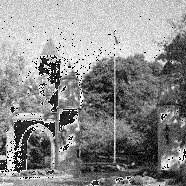

In [60]:
showarray(filtered_image)